In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn

Task 1: Exploratory Data Analysis (EDA)


In [ ]:
# Import necessary libraries
import pandas as pd

# Load the datasets (since you've already uploaded them)
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Preview the datasets to ensure they loaded correctly
print("Customers Dataset:")
print(customers.head())
print("\nProducts Dataset:")
print(products.head())
print("\nTransactions Dataset:")
print(transactions.head())


Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

In [ ]:
print("Missing Values:\n")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

Missing Values:

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [ ]:
merged_data = pd.merge(transactions, customers, on="CustomerID")
merged_data = pd.merge(merged_data, products, on="ProductID")

In [ ]:
top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Customers by Total Transaction Value:")
print(top_customers)


Top 5 Customers by Total Transaction Value:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


In [ ]:
popular_categories = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("\nPopular Product Categories:")
print(popular_categories)


Popular Product Categories:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


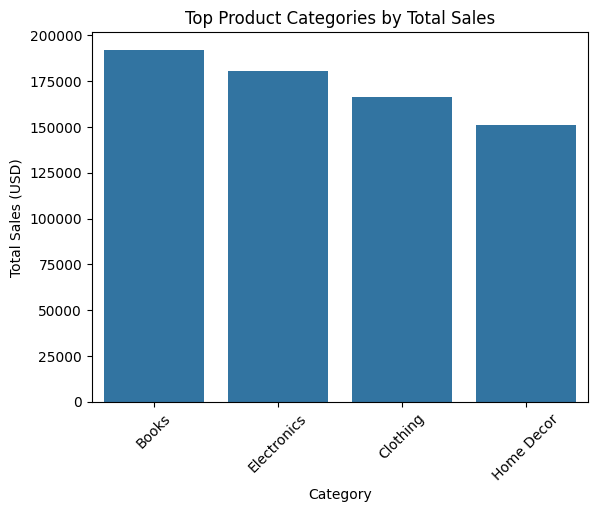

In [ ]:
sns.barplot(x=popular_categories.index, y=popular_categories.values)
plt.title("Top Product Categories by Total Sales")
plt.xlabel("Category")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.show()